# Cythosim example
Requires Python>=3.7  


### Compiling cythosim
Here we compile cythosim and move it to the burrent folder.

Skip this step if you have already compiled cythosim

In [1]:
%%bash
make -j4 pycytosim > compile_log.txt

bash: /home/dmitrief/anaconda3/lib/libtinfo.so.6: no version information available (required by bash)
makefile.inc:242: Using BLAS library in /usr/lib/x86_64-linux-gnu/
In file included from src/cpython/python_frame.h:19,
                 from src/tools/pycytosim.h:15,
                 from src/tools/pycytosim.cc:51:
src/cpython/python_utilities.h: In function ‘pybind11::dict& map_to_dict(const map_type&)’:
src/cpython/python_utilities.h:127:22: warning: structured bindings only available with ‘-std=c++17’ or ‘-std=gnu++17’
  127 |     for (const auto &[name, rec] : mappe) {
      |                      ^
In file included from src/tools/pycytosim.h:15,
                 from src/tools/pycytosim.cc:51:
src/cpython/python_frame.h: In function ‘void distribute_objects(Simul*, pybind11::dict&, ObjMap<Obj, Prp>, Set&, std::string)’:
src/cpython/python_frame.h:153:26: warning: structured bindings only available with ‘-std=c++17’ or ‘-std=gnu++17’
  153 |         for (const auto &[name, group]

In [2]:
from bin import cytosim
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_fibers(fibers):
    plt.figure()
    for f in fibers:
        p = f.points()
        plt.plot(p[:,0],p[:,1])
    plt.axis('equal')
    plt.show()

# Aster simulation
Here we simulate an aster with 32 microtubules of fixed size, larger than the cell radius.

In [4]:
parser = cytosim.start("cym/aster.cym")
sim = parser.simul

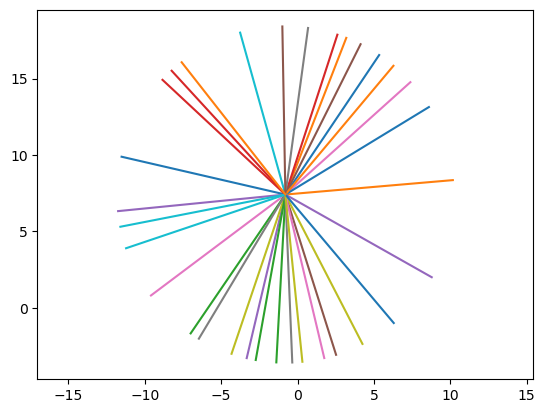

In [5]:
plot_fibers(sim.fibers)

### Saving the simulation
After, files "objects.cmo" and "properties.cmo" should be in the current folder

In [6]:
parser.save()

In [7]:
import os
cmo_files = [f for f in os.listdir() if f.endswith(".cmo")]
print(cmo_files)

['objects.cmo', 'properties.cmo', 'messages.cmo']


### Running the simulations
Here we run 5 times 8 simulations stems, and we record each time after 8 simulations steps.

In [8]:
for n in range(5):
    parser.run(8)
    parser.save()

### Opening a saved simulation

In [9]:
parser = cytosim.open()
sim = parser.simul
for i in range(5):
    if parser.next():
        plt.figure()
        plot_fibers(sim.fibers)
        plt.show()